In [1]:
#!pip install covidcast

This script uses the Dephi Epidata API to retrieve data from the COVIDcast dataset maintained by the Carnegie Mellon University Delphi Group.  Information on the Delphi Epidata API, including the covidcast Python library, can be found here: https://cmu-delphi.github.io/delphi-epidata/

In [2]:
import covidcast
import pandas
from datetime import date
import warnings
warnings.filterwarnings("ignore")

The following cell retrieves data on mask wearing for the 5 most populated counties in the United States for September 8th through December 31st, 2020.  Note that September 8th, 2020 is the first day mask-wearing was included in the survey from which this data was derived.

- Los Angeles County, CA (Los Angeles)
- Maricopa County, AZ (Phoenix)
- Harris County, TX (Houston)
- Miami-Dade County, FL (Miami)
- Cook County, IL (Chicago)

In [5]:
mask = covidcast.signal(data_source = "fb-survey",
                        signal = "smoothed_wearing_mask",
                        start_day = date(2020, 9, 8),
                        end_day = date(2020, 12, 31),
                        geo_type = "county",
                        geo_values = ["06037", "04013", "48201", "12086", "17031"])
mask = pandas.DataFrame(mask)

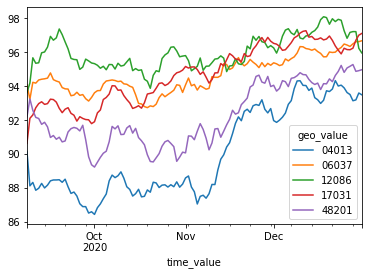

In [6]:
mask.pivot(index="time_value", columns="geo_value", values="value").plot()

In [7]:
claims = covidcast.signal(data_source = "fb-survey",
                        signal = "smoothed_adj_covid19_from_claims",
                        start_day = date(2020, 9, 8),
                        end_day = date(2020, 12, 31),
                        geo_type = "county",
                        geo_values = ["06037", "04013", "48201", "12086", "17031"])
claims = pandas.DataFrame(claims)